# Data Upload and Preprocess

In [2]:
import numpy as np
import os 
import os.path
from PIL import Image

#input과 label을 저장할 곳 만들기
input = []
label = []

shapes = ['figures/circle/', 'figures/square/', 'figures/star/', 'figures/triangle/']

for j in range(4):
    path = shapes[j]
    img_label = [0, 0, 0, 0] 
    img_label[j] = 1

    for i in range(3000):
        image_path = path + str(i) +'.png'
        img = Image.open(image_path) #Read Image
        img = img.resize((28, 28)) #Resize Image
        img_input = np.asarray(img)
        img_input = img_input.astype('float32')
        img_input /= 255.0 #Normalize Image

        input.append(img_input.flatten())
        label.append(img_label)

input = np.array(input)
label = np.array(label)

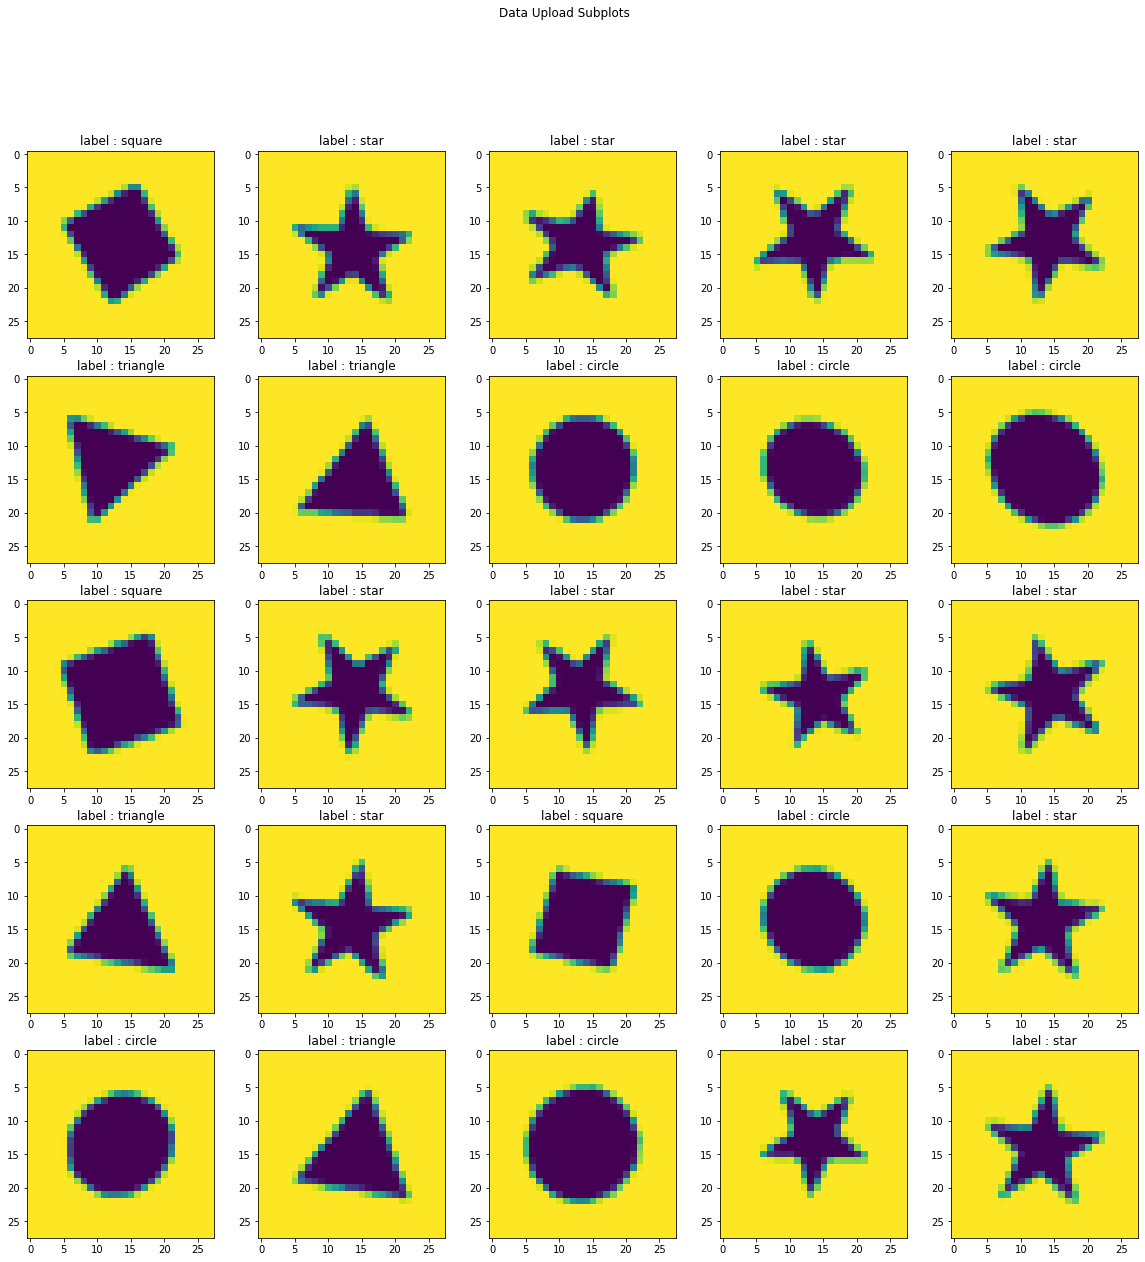

In [21]:
import matplotlib.pyplot as plt
label_dict = {0 : "circle", 1 : "square", 2 : "star", 3 : "triangle"}
randidx = np.random.randint(0,12000,size=25)
fig, axs = plt.subplots(5,5, figsize= (20,20))
fig.suptitle("Data Upload Subplots")
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(input[randidx[5*i+j]].reshape(28,28))
        l = np.argmax(label[randidx[5*i+j]])
        axs[i,j].set_title("label : " + label_dict[l])

# Define Functions and Model

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

    
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) 
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(len(x)):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val -h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [23]:
class TwoLayerNet:
    '''
    x : input
    t : target label
    '''
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y    
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward step
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward step
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


# Train Model

In [25]:
#Set Model and Hyperparameters
shape_classifier = TwoLayerNet(input_size=784, hidden_size=50, output_size=4)

iters_num = 10000  
train_size = input.shape[0]
batch_size = 100  
learning_rate = 0.1

train acc | 0.25
train acc | 0.6268333333333334
train acc | 0.8355
train acc | 0.9155833333333333
train acc | 0.8749166666666667
train acc | 0.93525
train acc | 0.9769166666666667
train acc | 0.9838333333333333
train acc | 0.9890833333333333
train acc | 0.9848333333333333
train acc | 0.995
train acc | 0.9960833333333333
train acc | 0.99475
train acc | 0.9969166666666667
train acc | 0.996
train acc | 0.9943333333333333
train acc | 0.997
train acc | 0.99675
train acc | 0.9970833333333333
train acc | 0.9970833333333333
train acc | 0.9975
train acc | 0.9975833333333334
train acc | 0.9976666666666667
train acc | 0.99775
train acc | 0.9980833333333333
train acc | 0.9981666666666666
train acc | 0.99825
train acc | 0.99825
train acc | 0.9981666666666666
train acc | 0.9986666666666667
train acc | 0.9988333333333334
train acc | 0.9973333333333333
train acc | 0.9985
train acc | 0.9989166666666667
train acc | 0.9990833333333333
train acc | 0.99875
train acc | 0.9994166666666666
train acc | 0.99883

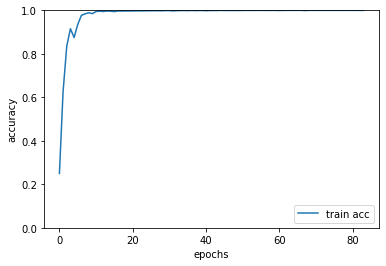

In [26]:
train_loss_list = []
train_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # Get Mini Batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = input[batch_mask]
    t_batch = label[batch_mask]

    # Calculate gradient
    grad = shape_classifier.gradient(x_batch, t_batch)
    
    # Learn Weights
    for key in ('W1', 'b1', 'W2', 'b2'):
        shape_classifier.params[key] -= learning_rate * grad[key]
    
    # Save metrics
    loss = shape_classifier.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # calculate accuracy
    if i % iter_per_epoch == 0:
        train_acc = shape_classifier.accuracy(input, label)
        train_acc_list.append(train_acc)
        print("train acc | " + str(train_acc))

# 그래프 그리기
markers = {'train': 'o'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [28]:
np.argmax(shape_classifier.predict(input[0]))

0

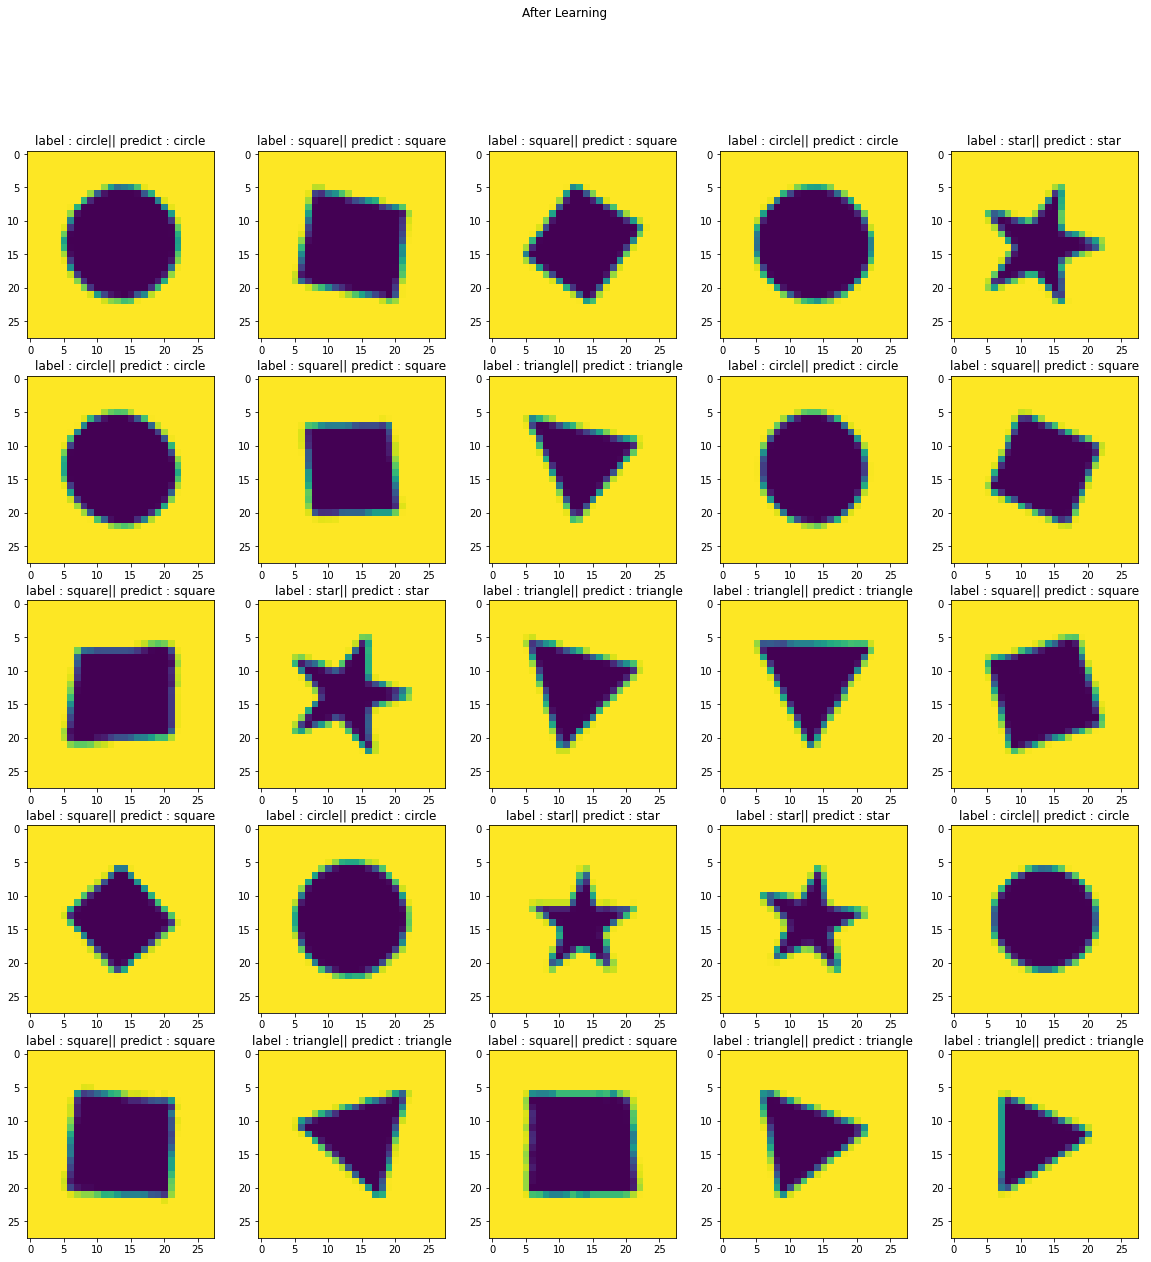

In [31]:
import matplotlib.pyplot as plt
label_dict = {0 : "circle", 1 : "square", 2 : "star", 3 : "triangle"}
randidx = np.random.randint(0,12000,size=25)
fig, axs = plt.subplots(5,5, figsize= (20,20))
fig.suptitle("After Learning")
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(input[randidx[5*i+j]].reshape(28,28))
        l = np.argmax(label[randidx[5*i+j]])
        t = np.argmax(shape_classifier.predict(input[randidx[5*i+j]]))
        axs[i,j].set_title("label : " + label_dict[l] + "|| predict : " + label_dict[t])